In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

df = pd.read_csv('iris_big.csv')
df.describe()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,1500.000000,1500.000000,1500.000000,1500.000000
mean,5.955380,3.139507,3.840667,1.239953
std,0.853156,0.426284,1.793186,0.776807
min,4.140000,1.950000,1.020000,0.050000
25%,5.260000,2.850000,1.600000,0.310000
50%,5.910000,3.105000,4.395000,1.370000
75%,6.560000,3.392500,5.252500,1.890000
max,8.400000,4.570000,7.230000,2.770000


In [4]:

col_names = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
all_inputs = df[col_names].values
all_classes = df['target_name'].values

(train_inputs, test_inputs, train_classes, test_classes) = train_test_split(all_inputs, all_classes, train_size=0.7, random_state=286123)

In [5]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(train_inputs)

train_inputs_st = scaler.transform(train_inputs)
test_inputs_st = scaler.transform(test_inputs)

In [6]:
scaled_df = pd.DataFrame(train_inputs_st,columns = col_names)
scaled_df.describe().T

,count,mean,std,min,25%,50%,75%,max
sepal length (cm),1050.0,8.274439e-15,1.000477,-2.109702,-0.822728,-0.050543,0.686542,2.874399
sepal width (cm),1050.0,7.284755e-15,1.000477,-2.593597,-0.652238,-0.084035,0.602543,3.372530
petal length (cm),1050.0,1.979369e-15,1.000477,-1.570067,-1.240389,0.310210,0.769803,1.810521
petal width (cm),1050.0,-2.466598e-15,1.000477,-1.528442,-1.192088,0.166268,0.838977,1.899788


In [22]:
from sklearn.neighbors import KNeighborsClassifier
classifier_3 = KNeighborsClassifier(n_neighbors=3)
classifier_5 = KNeighborsClassifier(n_neighbors=5)
classifier_11 = KNeighborsClassifier(n_neighbors=11)

classifier_3.fit(train_inputs_st, train_classes)
classifier_5.fit(train_inputs_st, train_classes)
classifier_11.fit(train_inputs_st, train_classes)

acc_3 = classifier_3.score(test_inputs_st, test_classes)
acc_5 = classifier_5.score(test_inputs_st, test_classes)
acc_11 = classifier_11.score(test_inputs_st, test_classes)

pred_3 = classifier_3.predict(test_inputs_st)
pred_5 = classifier_5.predict(test_inputs_st)
pred_11 = classifier_11.predict(test_inputs_st)



print(f'Accuracy for k=3: {acc_3}')
print(f'Accuracy for k=5: {acc_5}')
print(f'Accuracy for k=11: {acc_11}')

Accuracy for k=3: 0.9711111111111111
Accuracy for k=5: 0.9777777777777777
Accuracy for k=11: 0.98


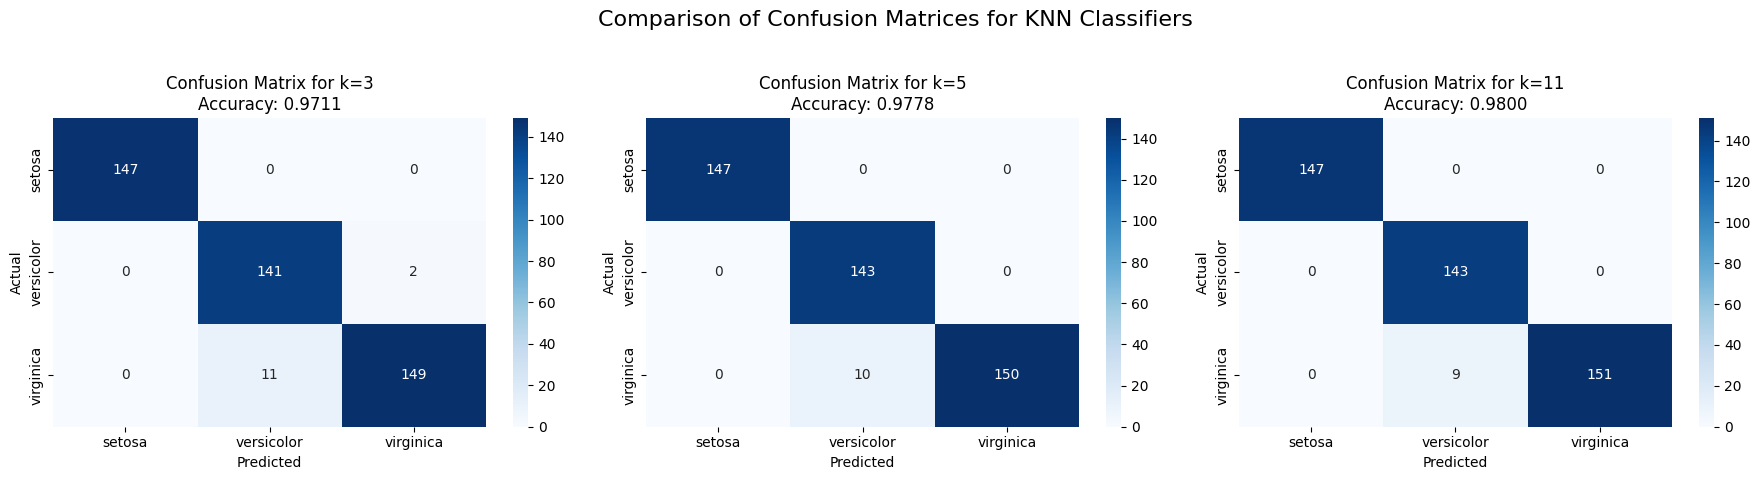

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import numpy as np

cm_5 = confusion_matrix(test_classes, pred_5)
cm_11 = confusion_matrix(test_classes, pred_11)
cm_3 = confusion_matrix(test_classes, pred_3)

cms = [cm_3, cm_5, cm_11]
k_values = [3, 5, 11]
titles = [f'k={k}' for k in k_values]


fig, axes = plt.subplots(1, 3, figsize=(18, 5))

class_labels = np.unique(test_classes) 

for i, (cm, title) in enumerate(zip(cms, titles)):
    sns.heatmap(
        cm,
        annot=True,
        fmt='d',
        cmap='Blues',
        ax=axes[i],
        xticklabels=class_labels,
        yticklabels=class_labels
    )
    axes[i].set_xlabel('Predicted')
    axes[i].set_ylabel('Actual')
    axes[i].set_title(f'Confusion Matrix for {title}\nAccuracy: {accuracies[i]:.4f}')

fig.suptitle('Comparison of Confusion Matrices for KNN Classifiers', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [ ]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
model.fit(train_inputs_st, train_classes)
pred = model.predict(test_inputs_st)

model_acc = model.score(test_inputs_st, test_classes)
print(f'Gaussian Naive Bayes Accuracy: {model_acc}')

Gaussian Naive Bayes Accuracy: 0.9711111111111111


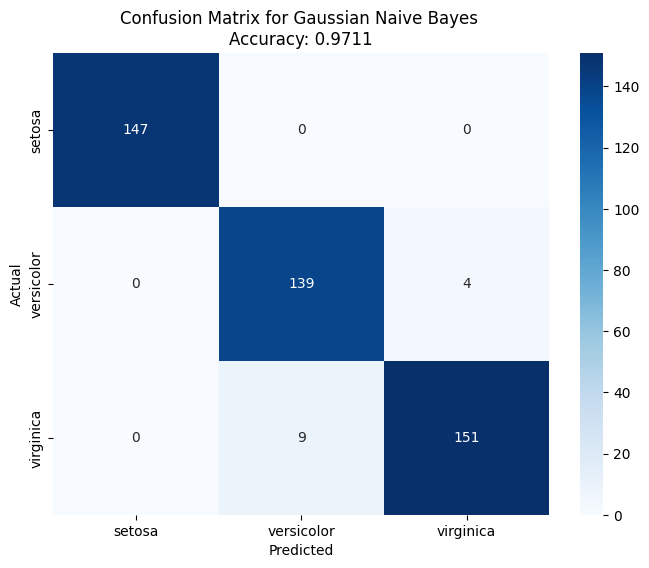

In [31]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm_nb = confusion_matrix(test_classes, pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm_nb, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(all_classes), yticklabels=np.unique(all_classes))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title(f'Confusion Matrix for Gaussian Naive Bayes \nAccuracy: {model_acc:.4f}')
plt.show()



In [32]:
acc_dd = 0.97
print(f'Decision Tree Accuracy: {acc_dd}')
print(f"KNN Classifier (k=3) Accuracy: {acc_3}")
print(f"KNN Classifier (k=5) Accuracy: {acc_5}")
print(f"KNN Classifier (k=11) Accuracy: {acc_11}")
print(f"Gaussian Naive Bayes Accuracy: {model_acc}")

Decision Tree Accuracy: 0.97
KNN Classifier (k=3) Accuracy: 0.9711111111111111
KNN Classifier (k=5) Accuracy: 0.9777777777777777
KNN Classifier (k=11) Accuracy: 0.98
Gaussian Naive Bayes Accuracy: 0.9711111111111111
